In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
filenames = [
    f for f in os.listdir('.')
    if not (f.startswith('.') or f.endswith('.ipynb'))
]
filenames

['1.csv', '2.csv']

In [3]:
data = pd.concat([pd.read_csv(f) for f in filenames], ignore_index=True)
data.head()

,subject,ruler,easyeyes
0,1,60,59.80
1,1,70,70.58
2,1,30,30.25
3,1,20,20.24
4,1,40,39.54


In [4]:
data['ruler_log'] = np.log(data['ruler'])
data['easyeyes_log'] = np.log(data['easyeyes'])

**RMS**

In [5]:
rms = np.sqrt(np.mean((data['ruler_log'] - data['easyeyes_log'])**2))

data_s = data[data['ruler'] <= 200]
data_l = data[data['ruler'] > 200]

rms_s = np.sqrt(np.mean((data_s['ruler_log'] - data_s['easyeyes_log'])**2))
rms_l = np.sqrt(np.mean((data_l['ruler_log'] - data_l['easyeyes_log'])**2))

rms, rms_s, rms_l

(0.010802218675688542, 0.009692175534127517, 0.014011129304345334)

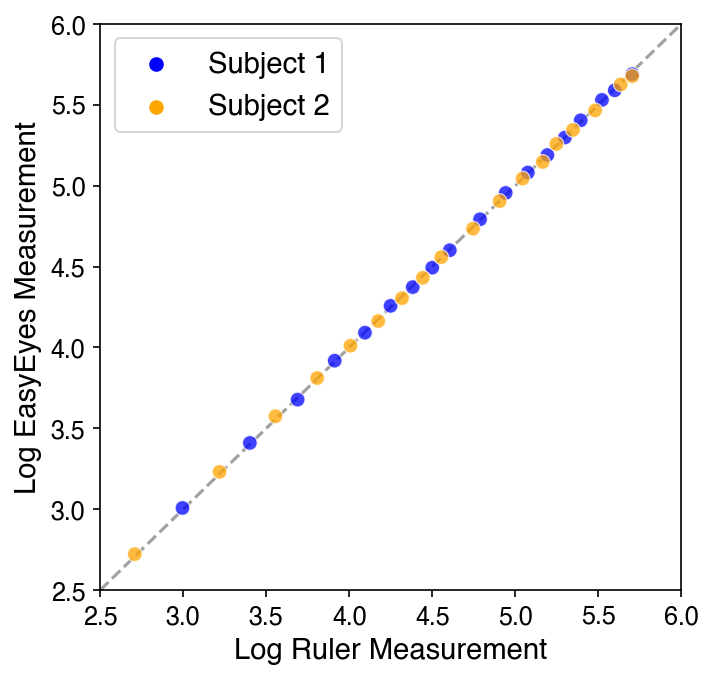

In [10]:
font_setting = {'fontsize': 14, 'fontname': 'Helvetica'}
tick_font_setting = {'fontsize': 12, 'fontname': 'Helvetica'}
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot([2.5, 6.0], [2.5, 6.0],
         alpha=0.5,
         linestyle='--',
         zorder=0,
         color='#444444')
s = sns.scatterplot(data=data,
                    x='ruler_log',
                    y='easyeyes_log',
                    hue='subject',
                    palette=['blue', 'orange'],
                    s=50,
                    alpha=0.75,
                    legend='full')
handles, labels = s.get_legend_handles_labels()
plt.legend(handles, ['Subject 1', 'Subject 2'],
           prop={
               'size': 14,
               'family': 'Helvetica'
           })
plt.xlabel('Log Ruler Measurement', **font_setting)
plt.ylabel('Log EasyEyes Measurement', **font_setting)
plt.xticks(**tick_font_setting)
plt.yticks(**tick_font_setting)
plt.xlim([2.5, 6.0])
plt.ylim([2.5, 6.0])
plt.savefig('fig1.png', bbox_inches='tight')

In [12]:
def cat(x):
    if x <= 100:
        return 1
    elif x > 100 and x <= 200:
        return 2
    else:
        return 3


new_data = data.copy()
new_data['distance'] = new_data['ruler'].map(cat)

old_data = data.copy()
old_data['distance'] = 0

all_data = pd.concat([old_data, new_data], ignore_index=True)
all_data['diff'] = (all_data['easyeyes'] -
                    all_data['ruler']) / all_data['ruler'] * 100

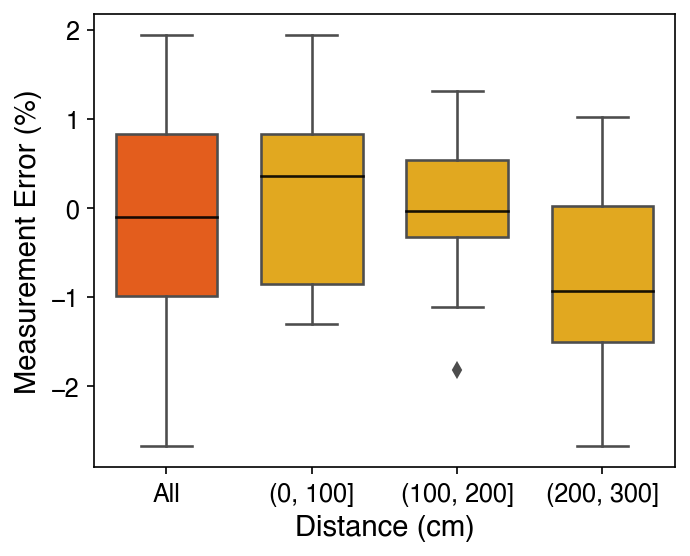

In [15]:
fig2, axs = plt.subplots(1, 1, figsize=(5, 4), dpi=150, sharey=True)
sns.boxplot(
    data=all_data,
    x='distance',
    y='diff',
    palette=['#fc5404', '#f9b208', '#f9b208', '#f9b208'],
    ax=axs,
    saturation=0.8,
    width=0.7,
    linewidth=1.25,
    # showfliers=False,
    medianprops=dict(color="black", alpha=0.9))
# sns.swarmplot(x="distance", y="diff", data=all_data, hue='subject')
plt.xlabel('Distance (cm)', **font_setting)
plt.ylabel('Measurement Error (%)', **font_setting)
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['All', '(0, 100]', '(100, 200]', '(200, 300]'],
           **tick_font_setting)
plt.yticks(**tick_font_setting)
# plt.ylim([2.5, 6.0])
plt.savefig('fig2.png', bbox_inches='tight')